<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/Gender_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv('/content/gender_classification_v7.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [6]:
df['gender']

,gender
0,0
1,1
2,0
3,0
4,1
...,...
4996,1
4997,1
4998,1
4999,1


In [7]:
X = df.drop(columns=["gender"])

In [8]:
y = df["gender"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [11]:
y

,gender
0,0
1,1
2,0
3,0
4,1
...,...
4996,1
4997,1
4998,1
4999,1


In [13]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(X_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [14]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Decision Tree Accuracy:", accuracy)

Optimized Decision Tree Accuracy: 0.973026973026973


In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       500
           1       0.97      0.98      0.97       501

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



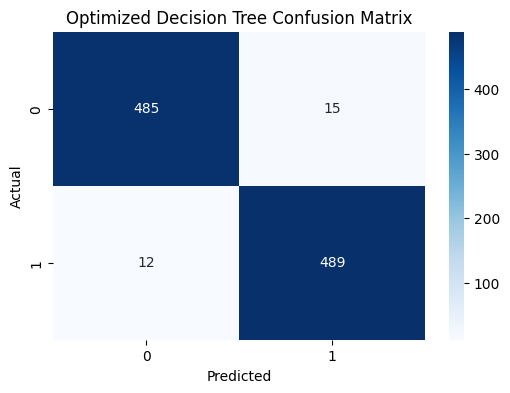

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Optimized Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

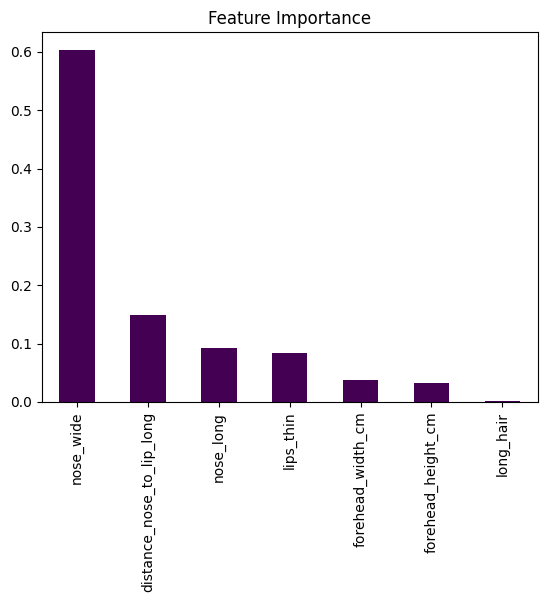

In [17]:
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', title="Feature Importance", colormap="viridis")
plt.show()

In [21]:
new_sample = [[1, 14, 6, 0, 1, 0, 2]]

In [22]:
prediction = dt_model.predict(new_sample)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
print("Predicted Gender:", "Female" if prediction[0] == 1 else "Male")

Predicted Gender: Female
